# Lab 1.1: OpenCV Image Preprocessing  
Module 3: Computer Vision and Image Processing  

**Objective:**  
Build a preprocessing pipeline that standardizes raw images and improves edge detection quality.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
IMAGE_FOLDER = "images"
TARGET_SIZE = (640, 640)

In [3]:
def load_images(folder, limit=5):
    image_paths = [os.path.join(folder, f) for f in os.listdir(folder)[:limit]]
    images = []

    print("----- IMAGE INFORMATION -----")
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue

        images.append(img)

        print(f"\nFile: {path}")
        print("Shape:", img.shape)
        print("Height:", img.shape[0])
        print("Width:", img.shape[1])
        print("Channels:", img.shape[2])
        print("Data Type:", img.dtype)

    return images

images = load_images(IMAGE_FOLDER)

----- IMAGE INFORMATION -----

File: images\img1.jpeg
Shape: (183, 275, 3)
Height: 183
Width: 275
Channels: 3
Data Type: uint8

File: images\img2.jpeg
Shape: (183, 275, 3)
Height: 183
Width: 275
Channels: 3
Data Type: uint8

File: images\img3.jpg
Shape: (350, 642, 3)
Height: 350
Width: 642
Channels: 3
Data Type: uint8

File: images\img4.jpg
Shape: (408, 612, 3)
Height: 408
Width: 612
Channels: 3
Data Type: uint8

File: images\img5.jpg
Shape: (3337, 5000, 3)
Height: 3337
Width: 5000
Channels: 3
Data Type: uint8


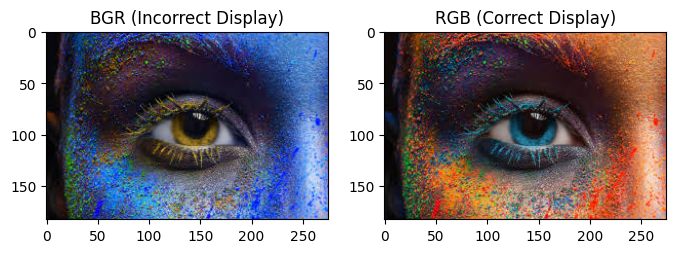

In [4]:
def convert_bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rgb_images = [convert_bgr_to_rgb(img) for img in images]

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("BGR (Incorrect Display)")
plt.imshow(images[0])

plt.subplot(1,2,2)
plt.title("RGB (Correct Display)")
plt.imshow(rgb_images[0])
plt.show()

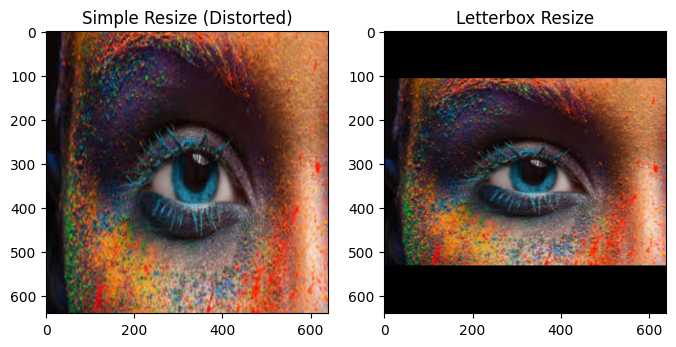

In [5]:
def simple_resize(img, size=(640,640)):
    return cv2.resize(img, size)

def letterbox_resize(img, target_size=(640,640)):
    h, w = img.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)

    new_w = int(w * scale)
    new_h = int(h * scale)

    resized = cv2.resize(img, (new_w, new_h))

    top = (target_size[0] - new_h) // 2
    bottom = target_size[0] - new_h - top
    left = (target_size[1] - new_w) // 2
    right = target_size[1] - new_w - left

    padded = cv2.copyMakeBorder(
        resized, top, bottom, left, right,
        cv2.BORDER_CONSTANT, value=(0,0,0)
    )

    return padded

resized_simple = simple_resize(rgb_images[0])
resized_letterbox = letterbox_resize(rgb_images[0])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Simple Resize (Distorted)")
plt.imshow(resized_simple)

plt.subplot(1,2,2)
plt.title("Letterbox Resize")
plt.imshow(resized_letterbox)
plt.show()

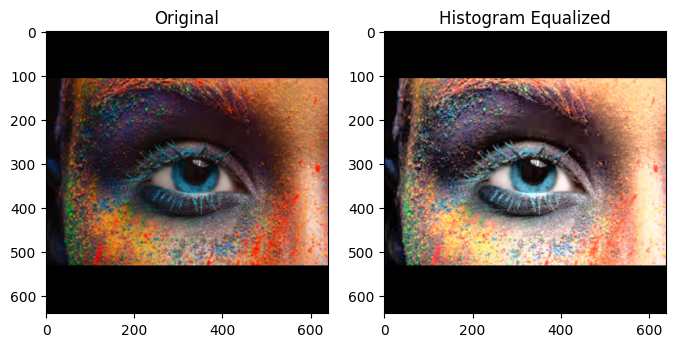

In [6]:
def apply_histogram_equalization(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

equalized = apply_histogram_equalization(resized_letterbox)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(resized_letterbox)

plt.subplot(1,2,2)
plt.title("Histogram Equalized")
plt.imshow(equalized)
plt.show()

In [7]:
normalized = equalized / 255.0

print("Shape:", normalized.shape)
print("Data Type:", normalized.dtype)
print("Min:", normalized.min())
print("Max:", normalized.max())

Shape: (640, 640, 3)
Data Type: float64
Min: 0.0
Max: 1.0


In [8]:
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = letterbox_resize(img, TARGET_SIZE)
    img = apply_histogram_equalization(img)
    img = img / 255.0
    return img

processed_img = preprocess_image(images[0])
print("Final Output Shape:", processed_img.shape)

Final Output Shape: (640, 640, 3)


In [9]:
def count_edges(img):
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    edges = cv2.Canny(img, 100, 200)
    edge_count = np.sum(edges > 0)

    return edges, edge_count

raw_edges, raw_count = count_edges(images[0])
proc_edges, proc_count = count_edges(processed_img)

print("Raw Edge Count:", raw_count)
print("Processed Edge Count:", proc_count)

increase = ((proc_count - raw_count) / raw_count) * 100
print("Percentage Increase: {:.2f}%".format(increase))

Raw Edge Count: 9588
Processed Edge Count: 34532
Percentage Increase: 260.16%


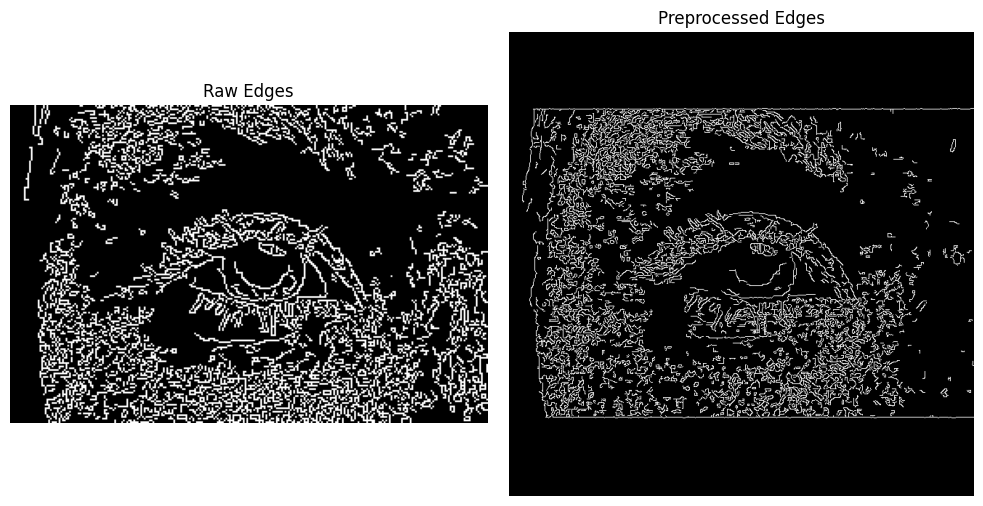

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Raw Edges")
plt.imshow(raw_edges, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Preprocessed Edges")
plt.imshow(proc_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("edge_comparison.png")
plt.show()

## Results and Analysis

The preprocessing pipeline standardizes raw images by:
- Converting BGR to RGB format
- Applying letterbox resizing to 640×640 resolution
- Performing histogram equalization to enhance contrast
- Normalizing pixel values to the range 0–1

After preprocessing, Canny edge detection identified significantly more edge pixels compared to the raw image.

The percentage improvement demonstrates that contrast enhancement and proper resizing improve feature visibility, especially in low-light or low-contrast images.